In [16]:
from tensorflow import keras

from keras.applications.resnet50 import ResNet50
from keras.layers import Dense,Flatten
from keras.models import Model
from glob import glob
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img

import matplotlib.pyplot as plt

In [17]:
##Image Size

image_size = [224,224]

train_path = "Datasets/Train/"
test_path =  "Datasets/Test/"

In [18]:
##Importing the Resnet50 Library

resnet = ResNet50(input_shape = image_size + [3],weights = "imagenet",include_top = False)

In [19]:
resnet.trainable = False

In [20]:
folders = glob("Datasets/Train/*")
len(folders)

4

In [21]:
#Flattening the Layers

x = Flatten()(resnet.output)

In [22]:
prediction = Dense(len(folders),activation = "softmax")(x)

#Creating the Model Object

model = Model(inputs = resnet.input,outputs = prediction)

In [23]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [24]:
#Compiling the Model

model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = "accuracy")

In [25]:
##Image Data Generator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255)

In [26]:
##Creating the training set

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")


Found 96 images belonging to 4 classes.


In [27]:
test_set = train_datagen.flow_from_directory(test_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")

Found 93 images belonging to 4 classes.


In [28]:
##Fit the model

final = model.fit_generator(
    training_set,
    steps_per_epoch = len(training_set),
    epochs = 30,
    validation_data = test_set,
    validation_steps = len(test_set)
)

Epoch 1/30
3/3 [==============================] - 16s 5s/step - loss: 7.8564 - accuracy: 0.2188 - val_loss: 8.6626 - val_accuracy: 0.4086
Epoch 2/30
3/3 [==============================] - 17s 6s/step - loss: 10.0801 - accuracy: 0.2708 - val_loss: 10.6081 - val_accuracy: 0.0968
Epoch 3/30
3/3 [==============================] - 18s 6s/step - loss: 5.7362 - accuracy: 0.2292 - val_loss: 3.1842 - val_accuracy: 0.3226
Epoch 4/30
3/3 [==============================] - 19s 6s/step - loss: 3.8123 - accuracy: 0.3438 - val_loss: 4.9746 - val_accuracy: 0.3763
Epoch 5/30
3/3 [==============================] - 20s 7s/step - loss: 2.7485 - accuracy: 0.4792 - val_loss: 3.4887 - val_accuracy: 0.1935
Epoch 6/30
3/3 [==============================] - 20s 7s/step - loss: 2.0465 - accuracy: 0.3750 - val_loss: 2.8269 - val_accuracy: 0.3656
Epoch 7/30
3/3 [==============================] - 19s 6s/step - loss: 1.3390 - accuracy: 0.5208 - val_loss: 2.3045 - val_accuracy: 0.3871
Epoch 8/30
3/3 [================

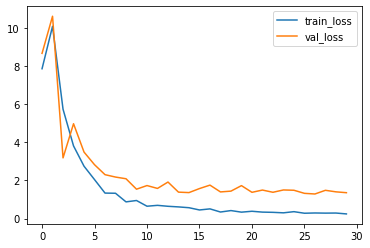

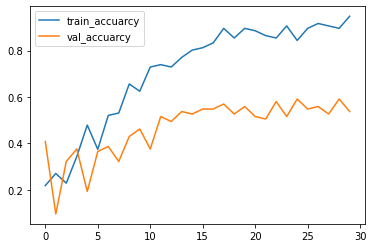

In [29]:
#Plot the Loss
plt.plot(final.history["loss"],label = "train_loss")
plt.plot(final.history["val_loss"],label = "val_loss")
plt.legend()
plt.show()

#Plot the Accuracy
plt.plot(final.history["accuracy"],label = "train_accuarcy")
plt.plot(final.history["val_accuracy"],label = "val_accuarcy")
plt.legend()
plt.show()

In [34]:
##Saving the Model

from keras.models import load_model

model.save("model_vgg16.h5")

In [38]:
y_pred = model.predict(test_set)

In [39]:
y_pred[0]

array([8.8537358e-02, 8.5145837e-01, 5.9342224e-02, 6.6209462e-04],
      dtype=float32)

In [40]:
import numpy as np
y_pred = np.argmax(y_pred,axis = 1)

In [41]:
y_pred

array([1, 3, 3, 1, 0, 1, 3, 3, 1, 0, 3, 3, 1, 3, 2, 1, 0, 0, 1, 3, 2, 0,
       2, 1, 0, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 3, 3, 0, 2, 1, 2, 0, 2, 3,
       0, 0, 1, 0, 0, 3, 1, 1, 3, 2, 3, 1, 1, 3, 0, 3, 1, 1, 0, 3, 2, 3,
       3, 0, 1, 1, 2, 3, 2, 3, 1, 2, 2, 1, 2, 2, 3, 0, 0, 1, 2, 0, 3, 3,
       2, 1, 3, 2, 1])

In [44]:
from keras.preprocessing import image

In [57]:
#Test data

img = load_img("Datasets/Test/others/lexus.jpg",target_size = (224,224))

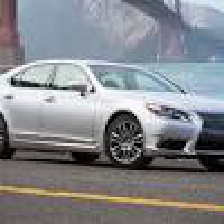

In [58]:
img

In [59]:
img_data = image.img_to_array(img)

In [60]:
img_data.shape

(224, 224, 3)

In [61]:
#Scaling the pixel values of image
img_data = img_data/255
img_data = np.expand_dims(img_data,axis = 0)

In [62]:
img_data.shape

(1, 224, 224, 3)

In [63]:
model.predict(img_data)

array([[0.03911205, 0.01187976, 0.0172446 , 0.9317636 ]], dtype=float32)

In [64]:
np.argmax(model.predict(img_data))

3